In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

"""
Load AirQualityUCI Data
"""

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = './data/AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)

df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_6996\3712437291.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


<AxesSubplot:xlabel='Datetime'>

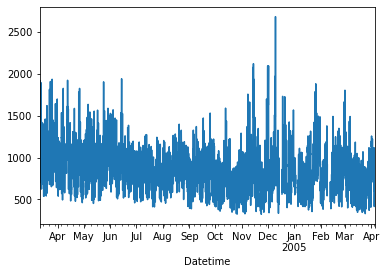

In [2]:
df['PT08.S3(NOx)'].plot()

In [3]:
PT08 = df['PT08.S3(NOx)'].copy()
PT08.interpolate(inplace=True)

In [4]:
q1 = PT08.quantile(0.20)
median = PT08.quantile(0.3)
q3 = PT08.quantile(0.55)
q1, median, q3

(621.0, 687.0, 832.0)

In [5]:
iqr = q3 - q1
upper_fence = q3 + 1.5*iqr
lower_fence = q1 - 1.5*iqr
iqr, upper_fence, lower_fence

(211.0, 1148.5, 304.5)

In [6]:
outliers = PT08.loc[(PT08 > upper_fence) | (PT08 < lower_fence)]
outliers

Datetime
2004-03-10 19:00:00    1174.0
2004-03-10 22:00:00    1205.0
2004-03-10 23:00:00    1337.0
2004-03-11 00:00:00    1462.0
2004-03-11 01:00:00    1453.0
                        ...  
2005-03-13 06:00:00    1184.0
2005-04-01 01:00:00    1198.0
2005-04-01 03:00:00    1187.0
2005-04-01 04:00:00    1257.0
2005-04-02 04:00:00    1223.0
Name: PT08.S3(NOx), Length: 948, dtype: float64

In [7]:
mask = PT08.index.isin(outliers.index)
PT08[~mask]

Datetime
2004-03-10 18:00:00    1056.0
2004-03-10 20:00:00    1140.0
2004-03-10 21:00:00    1092.0
2004-03-11 08:00:00    1136.0
2004-03-11 09:00:00    1079.0
                        ...  
2005-04-04 10:00:00     539.0
2005-04-04 11:00:00     604.0
2005-04-04 12:00:00     603.0
2005-04-04 13:00:00     702.0
2005-04-04 14:00:00     654.0
Name: PT08.S3(NOx), Length: 8409, dtype: float64

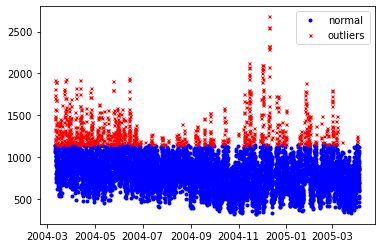

In [8]:
plt.plot(PT08[~mask], label='normal', color='blue',
    marker='o', markersize=3, linestyle='None')
plt.plot(outliers, label='outliers', color='red',
    marker='x', markersize=3, linestyle='None')
plt.legend(loc='best')

In [9]:
mean = np.mean(PT08)
std = np.std(PT08)

mean,std

(832.7588970823982, 255.69616900657363)

In [10]:
outliers = []
thres = 3

for i in PT08:
    z_score = (i - mean) / std
    if (np.abs(z_score) > thres):
        print(z_score)
        outliers.append(i)

3.4112404042126165
3.8531711552247483
4.244260315412475
3.5402998270745667
3.3134681141656848
4.146488025365544
4.154309808569298
3.3330225721750715
3.0788146180530487
3.833616697215362
3.6106958759083576
3.7280226239646757
3.395596837805108
4.205151399393703
3.419062187416371
4.310745472644389
3.0162403524230124
3.168765124896226
3.051438376839908
3.387775054601353
3.5833196346952167
3.8844582880397667
3.4112404042126165
3.0592601600436624
3.8688147216322575
4.2638147734218625
3.6106958759083576
3.051438376839908
3.716289949159044
3.462081995037021
3.4777255614445304
3.8844582880397667
3.137477992081208
3.098369076062435
3.8101513476040982
4.189507832986194
3.794507781196589
3.763220648381571
4.334210822255653
4.240349423810598
3.4034186210088624
3.6146067675102347
3.254804740137526
3.0045076776173807
3.2469829569337714
3.168765124896226
3.6693592499365164
4.8660920801109615
4.807428706082803
4.424161329098831
3.7553988651778165
3.2508938485356484
3.4542602118332666
5.038171310593562
